In [6]:
import carreau_yasuda
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
lve_data = pd.read_csv("PP_0515_190C.csv") #Import viscoelastic moduli
lve_data = carreau_yasuda.calc_eta_star(lve_data) #Calculate complex viscosity
lve_data.head()

,w,G_p,G_pp,eta_star
0,500.000,96294.0,57836.0,224.655624
1,312.370,80898.0,51523.0,307.046034
2,195.150,65985.0,46284.0,413.011461
3,121.920,52578.0,41041.0,547.075119
4,76.165,40924.0,35704.0,713.053950


In [14]:
eta_estimated, *estimates = carreau_yasuda.fit(lve_data, eta_0=5E3,
                                              eta_inf=1E-4, lam=0.132,
                                              a=0.5448, n=0.292)
estimates = estimates[0]

In [16]:
print(f"Estimated Parameters:\n\
eta_0: {estimates[0]:.2f} Pa.s\n\
eta_inf: {estimates[1]:.2f} Pa.s\n\
lam: {estimates[2]:.2f} s\n\
a: {estimates[3]:.2f}\n\
n: {estimates[4]:.2f}\n")

Estimated Values:
eta_0: 5000.00 Pa.s
eta_inf: 0.00 Pa.s
lam: 0.55 s
a: 0.29
n: 0.13



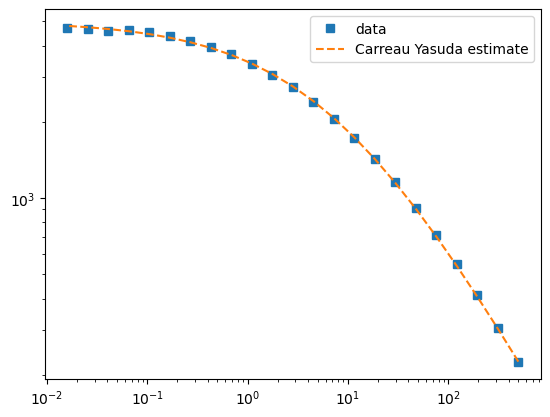

In [17]:
fig, axs = plt.subplots(1)
axs.loglog(lve_data['w'], lve_data['eta_star'], 's', label='data')
axs.loglog(eta_estimated['w'], eta_estimated['eta_star'], '--',
           label='Carreau Yasuda estimate')
axs.legend()